In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/chiroptera/workspace/QCThesis/CUDA/

/home/chiroptera/workspace/QCThesis/CUDA


In [3]:
import K_Means3
from K_Means3 import *
reload(K_Means3)

<module 'K_Means3' from 'K_Means3.pyc'>

In [4]:
from sklearn import datasets # generate gaussian mixture

def generateData(n,d,k):
    n_int = np.int(n)

    # Generate data
    data, groundTruth = datasets.make_blobs(n_samples=n_int,n_features=d,centers=k,
                                            center_box=(-1000.0,1000.0))
    data = data.astype(np.float32)  
    
    return data,groundTruth

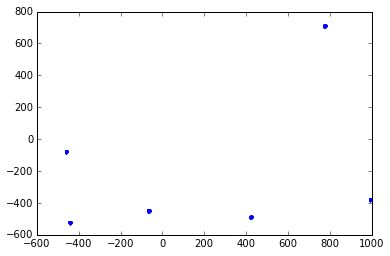

In [5]:
data,labels = generateData(1e2,2,6)

plt.plot(data[:,0],data[:,1],'.')

In [6]:
k=12
iters=100

In [7]:
#%%debug -b K_Means3.py:577n
reload(K_Means3)
grouperCUDA = K_Means()
grouperCUDA._centroid_mode="index"
grouperCUDA._cuda_mem="manual"
grouperCUDA.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)

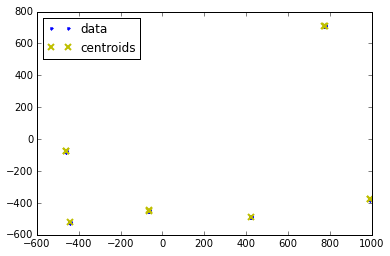

In [8]:
plt.plot(data[:,0],data[:,1],'.',label="data")
plt.plot(grouperCUDA.centroids[:,0],grouperCUDA.centroids[:,1],'yx',mew=2,label="centroids")
plt.legend(loc="best")

In [9]:
print grouperCUDA.centroids
print ""
for c in grouperCUDA.partition:
    print c
print ""
print grouperCUDA.labels_
print ""
print '# centroids:\t\t', len(np.unique(grouperCUDA.labels_))
print '# partition clusters:\t',len(grouperCUDA.partition)
print '# label clusters:\t',np.unique(grouperCUDA.labels_).size

def countSamples(partition):
    count=0
    for c in partition:
        count += c.size
    return count

print countSamples(grouperCUDA.partition)

[[ 992.56048584 -376.89523315]
 [ 774.58990479  712.4800415 ]
 [ -64.87361145 -448.95233154]
 [ -66.11804199 -447.28579712]
 [-460.16653442  -75.57642365]
 [-460.33969116  -77.38581085]
 [ 774.84820557  710.67041016]
 [ 422.27618408 -486.49133301]
 [ 992.40844727 -378.55599976]
 [-442.13818359 -521.44940186]]

[41 60 80 11 58 88 86 90  2 37 68]
[29 65 26 98 25 59 53 99 89]
[39 96 70 14 50]
[16 38 44 47 33 91 87 57 10 83 22 61]
[84 42 67 63 49 15 28]
[82 19 64  1 34 62 72 52 27]
[12 71  5 94 30 51 69]
[ 8 40 85 78 79 13 81  7 20 92 24 56 32 48 97 43  4]
[ 3 66 23  6 35  9]
[93 95 36 76 75 74 73 17 18 21 55 54 31 46 45 77  0]

[9 5 0 8 7 6 8 7 7 8 3 0 6 7 2 4 3 9 9 5 7 9 3 8 7 1 1 5 4 1 6 9 7 3 5 8 9
 0 3 2 7 0 4 7 3 9 9 3 7 4 2 6 5 1 9 9 7 3 0 1 0 3 5 4 5 1 8 4 0 6 2 6 5 9
 9 9 9 9 7 7 0 7 5 3 4 7 0 3 0 1 0 3 7 9 6 9 2 7 1 1]

# centroids:		10
# partition clusters:	10
# label clusters:	10
100


In [196]:
a=grouperCUDA.partition[0]
VIstring = ','.join(['%d' % num for num in a])

In [197]:
VIstring

'848,326,799,794,963,885,886,559,560,577,327,603,747,949,180,719,934,718,214,217,920,753,810,793,419,462,825,432,864,118,117,980,995,979,452'

In [10]:
import pandas as pd

In [13]:
r=pd.DataFrame(grouperCUDA.partition)

In [16]:
filename='/home/chiroptera/workspace/test.csv'

In [18]:
r

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,424,348,143,258,42,646,931,929,927,259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,279,768,386,550,467,763,950,718,571,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,807,118,212,253,570,534,625,797,562,276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,623,208,636,629,633,674,673,659,669,645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,257,6,99,112,568,546,545,789,553,524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,733,732,440,441,720,785,734,908,735,448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,154,750,136,759,760,151,752,150,749,142,...,405,404,226,403,402,400,615,408,493,492
7,811,836,75,312,846,849,116,85,642,730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,387,67,305,930,928,912,968,50,360,486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,325,40,264,622,547,627,139,980,590,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
r.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,424,279,807,623,257,733,154,811,387,325,677,NaN
1,348,768,118,208,6,732,750,836,67,40,586,NaN
2,143,386,212,636,99,440,136,75,305,264,173,NaN
3,258,550,253,629,112,441,759,312,930,622,967,NaN
4,42,467,570,633,568,720,760,846,928,547,302,NaN
5,646,763,534,674,546,785,151,849,912,627,922,NaN
6,931,950,625,673,545,734,752,116,968,139,199,NaN
7,929,718,797,659,789,908,150,85,50,980,842,NaN
8,927,571,562,669,553,735,749,642,360,590,114,NaN
9,259,416,276,645,524,448,142,730,486,367,388,NaN


In [19]:
r.to_csv(filename,header=False,index=False)